In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# **Tabla de contenidos**
***
Redes Neuronales (MLP)
1.  Modelo 1 (baseline)

    1.1. Creación del modelo baseline

    1.2. Evaluación del modelo baseline

2.  Modelo 2

    2.1. Creación del modelo 2

    2.2. Evaluación del modelo 2
    
3.  Modelo 3

    3.1. Creación del modelo 3

    3.2. Evaluación del modelo 3

4.  Evaluación general y conclusiones

***

# **Redes Neuronales** (MLP)

Un **modelo MLP** *(perceptrón multicapa)* es una clase de red neuronal que se caracteriza por estar inspirado en las neuronas biológicas y su principal cometido es la **clasificación de datos**.

En nuestro caso vamos a utilizar un modelo MLP para predecir y clasificar **qué tipo de crimen es más posible que le ocurra a una víctima** dependiendo de los siguientes datos:

In [26]:
ruta_csv = '../../../data/Personal_Victimization_Original.csv'
datos = pd.read_csv(ruta_csv)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68852 entries, 0 to 68851
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idper           68852 non-null  object 
 1   yearq           68852 non-null  float64
 2   year            68852 non-null  int64  
 3   ager            68852 non-null  int64  
 4   sex             68852 non-null  int64  
 5   hispanic        68852 non-null  int64  
 6   race            68852 non-null  int64  
 7   race_ethnicity  68852 non-null  int64  
 8   hincome1        68852 non-null  int64  
 9   hincome2        68852 non-null  int64  
 10  marital         68852 non-null  int64  
 11  popsize         68852 non-null  int64  
 12  region          68852 non-null  int64  
 13  msa             68852 non-null  int64  
 14  locality        68852 non-null  int64  
 15  educatn1        68852 non-null  int64  
 16  educatn2        68852 non-null  int64  
 17  veteran         68852 non-null 

En este caso la variable a predecir seria ***newoff***.

In [27]:
print(datos["newoff"])
print("-------------------")
print(datos["newoff"].value_counts())

0        5
1        2
2        4
3        4
4        4
        ..
68847    4
68848    4
68849    4
68850    4
68851    4
Name: newoff, Length: 68852, dtype: int64
-------------------
newoff
4    42657
3    13250
2     7199
1     3583
5     2163
Name: count, dtype: int64


In [28]:
x_train = pd.read_csv('../../../data/x_train.csv')
y_train = pd.read_csv('../../../data/y_train.csv')
x_test = pd.read_csv('../../../data/x_test.csv')
y_test = pd.read_csv('../../../data/y_test.csv')

In [29]:
x_train

,ager_18-24,ager_25-34,ager_35-49,ager_50-64,ager_65+,sex_Male,race_ethnicity_Non-Hispanic American Indian/Alaska Native,race_ethnicity_Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander,race_ethnicity_Non-Hispanic black,race_ethnicity_Non-Hispanic more than one race,...,educatn1_Residue,veteran_Residue,veteran_Veteran,citizen_Naturalized citizen,citizen_Non-U.S. citizen,citizen_Residue,locationr_At or near victim’s home,"locationr_Commercial place, parking lot, or other public area",locationr_Other location,locationr_School
0,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
3,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44697,False,False,True,False,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
44698,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
44699,True,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,True,True,False,False,False
44700,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True


In [30]:
y_test

,newoff
0,4
1,4
2,4
3,4
4,3
...,...
11171,5
11172,3
11173,3
11174,4


## 1. Explicación modelo baseline

### 1.1. Creación modelo baseline


In [31]:
# Modelo simple
model_baseline = Sequential([
    Dense(32, activation='relu', input_shape=(47,)),
    Dense(6, activation='softmax')  # 5 clases
])

c:\Users\iabd\AppData\Local\anaconda3\envs\PrimerEntorno\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model_baseline.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [33]:
history_crime = model_baseline.fit(x_train, y_train,
                                   validation_split=0.2,
                                   epochs=20,
                                   batch_size=32,
                                   verbose=1)

Epoch 1/20
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6132 - loss: 1.0961 - val_accuracy: 0.6269 - val_loss: 1.0424
Epoch 2/20
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6235 - loss: 1.0359 - val_accuracy: 0.6264 - val_loss: 1.0331
Epoch 3/20
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6246 - loss: 1.0305 - val_accuracy: 0.6267 - val_loss: 1.0349
Epoch 4/20
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6253 - loss: 1.0273 - val_accuracy: 0.6261 - val_loss: 1.0333
Epoch 5/20
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6249 - loss: 1.0252 - val_accuracy: 0.6277 - val_loss: 1.0310
Epoch 6/20
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6253 - loss: 1.0233 - val_accuracy: 0.6280 - val_loss: 1.0318
Epoch 7/20
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6259 - loss: 1.0210 - val_accuracy: 0.6267 - val_loss: 1.0331
Epoch 8/20
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6258 - loss: 1.0197 - 

### 1.2. Evaluación modelo baseline

In [34]:
# Evaluar train

train_loss, train_acc = model_baseline.evaluate(x_train, y_train, verbose=0)

print(f"Train Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Train Loss: {train_loss:.4f}")
print("="*50)

print("\n Baseline del azar (3 clases): 33.3%")

Train Accuracy: 0.6279 (62.79%)
Train Loss: 1.0097

 Baseline del azar (3 clases): 33.3%


In [36]:
# Evaluar test

test_loss, test_acc = model_baseline.evaluate(x_test, y_test, verbose=0)

print("="*50)
print(" RESULTADOS BASELINE - Tipos crimen")
print("="*50)
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")
print("="*50)

 RESULTADOS BASELINE - Tipos crimen
Test Accuracy: 0.6216 (62.16%)
Test Loss: 1.0349


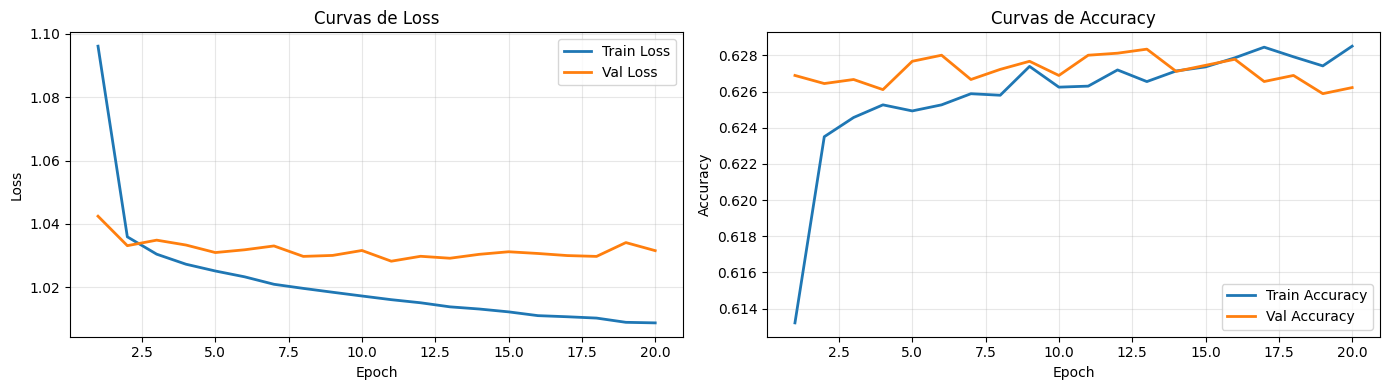

In [37]:
# Visualización de curvas de entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Crear rango de epochs (1 a 20, no 0 a 19)
epochs = range(1, len(history_crime.history['loss']) + 1)

# Loss
ax1.plot(epochs, history_crime.history['loss'], label='Train Loss', linewidth=2)
ax1.plot(epochs, history_crime.history['val_loss'], label='Val Loss', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Curvas de Loss')
ax1.legend()
ax1.grid(alpha=0.3)

# Accuracy
ax2.plot(epochs, history_crime.history['accuracy'], label='Train Accuracy', linewidth=2)
ax2.plot(epochs, history_crime.history['val_accuracy'], label='Val Accuracy', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Curvas de Accuracy')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


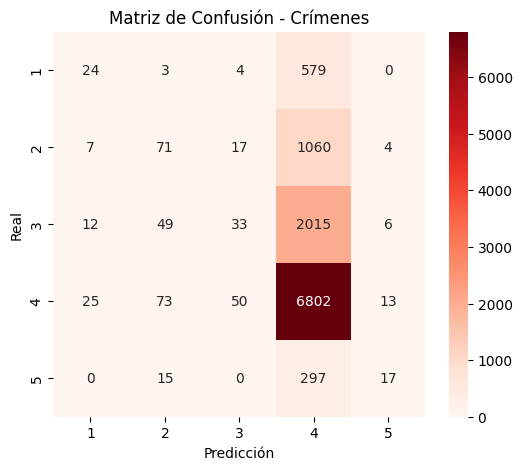


 Classification Report:
              precision    recall  f1-score   support

           1       0.35      0.04      0.07       610
           2       0.34      0.06      0.10      1159
           3       0.32      0.02      0.03      2115
           4       0.63      0.98      0.77      6963
           5       0.42      0.05      0.09       329

    accuracy                           0.62     11176
   macro avg       0.41      0.23      0.21     11176
weighted avg       0.52      0.62      0.50     11176



In [39]:
# Matriz de confusión
y_pred_crime = model_baseline.predict(x_test)
y_pred_crime_classes = np.argmax(y_pred_crime, axis=1)

cm = confusion_matrix(y_test, y_pred_crime_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'])
plt.title('Matriz de Confusión - Crímenes')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

print("\n Classification Report:")
print(classification_report(y_test, y_pred_crime_classes, 
                          target_names=['1', '2', '3', '4', '5']))

## 2. Explicación modelo 2

### 2.1. Creación modelo 2

### 2.2. Evaluación modelo 2

## 3. Explicación modelo 3

### 3.1. Creación modelo 3

### 3.2. Evaluación modelo 3

# Evaluación general de todos los modelos